## 0. Preperation

- Install latest version of SAHI and Torchvision:

In [1]:
!pip install -U git+https://github.com/obss/sahi
!pip install torch torchvision

  Cloning https://github.com/obss/sahi to /tmp/pip-req-build-tr9b5q4l
  Running command git clone --filter=blob:none --quiet https://github.com/obss/sahi /tmp/pip-req-build-tr9b5q4l
  Resolved https://github.com/obss/sahi to commit deaed7ac02498c0f5839d7bc0ebd18b50e9f7019
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sahi: filename=sahi-0.11.14-py3-none-any.whl size=105152 sha256=40c6352f36284550d127e871b913849ccc58a722e6828890c329d2f60d057691
  Stored in directory: /tmp/pip-ephem-wheel-cache-9znagyr9/wheels/01/d1/cb/1c8f4763db40a5b7f9ec24903f579e182ea660cc3ed0e8e542
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=5f34b13130441768e9eebfab6255de5388b3f3ec98e2d3ae36d51a51ed16b665
  Stored in directory: /root/.cache/pip/wheel

In [2]:
import os
os.getcwd()

'/content'

- Import required modules:

In [3]:
# import required functions, classes
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [4]:
# set torchvision FasterRCNN model
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 84.8MB/s]


## 1. Standard Inference with a Torchvision Model

- Instantiate a torchvision model by defining model weight path, confing path and other parameters:

In [5]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='torchvision',
    model=model,
    confidence_threshold=0.5,
    image_size=640,
    device="cpu", # or "cuda:0"
    load_at_init=True,
)


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [6]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [7]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

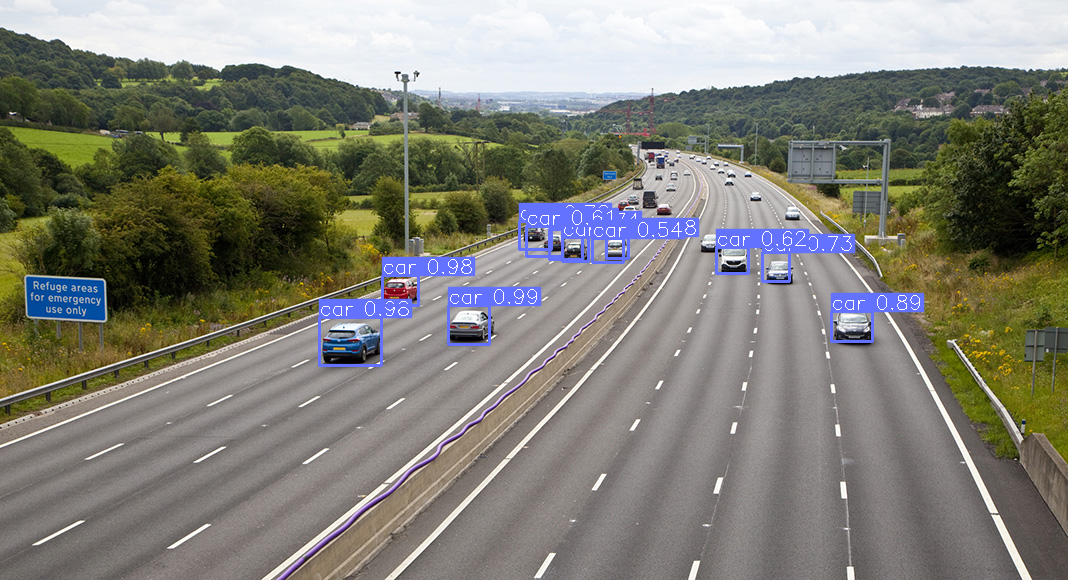

In [8]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a TorchVision Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [9]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 320,
    slice_width = 320,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 12 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

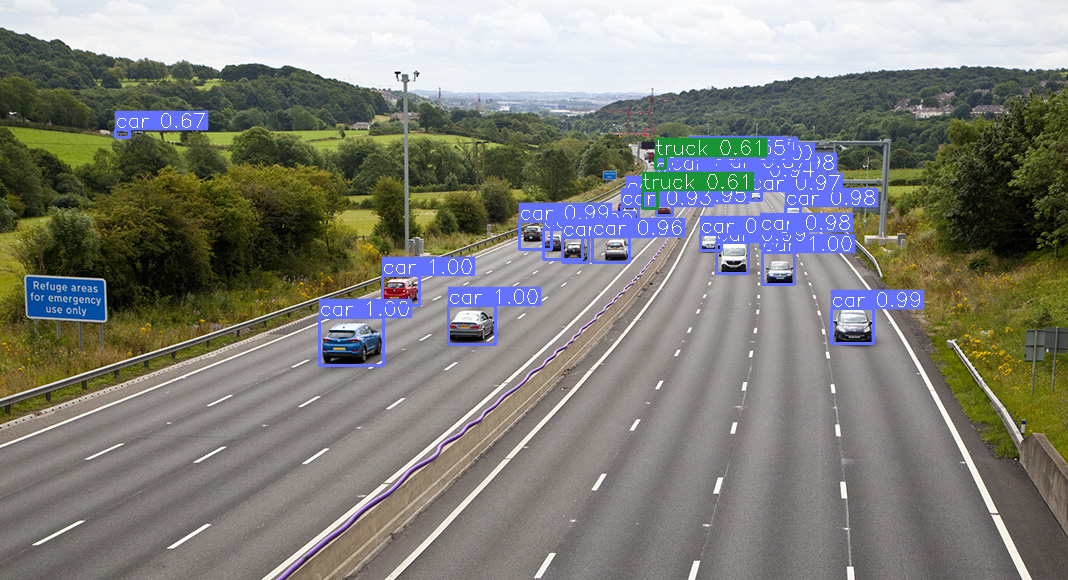

In [10]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [11]:
object_prediction_list = result.object_prediction_list

In [12]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(319.998779296875, 317.1034240722656, 383.7492370605469, 365.4188232421875), w: 63.750457763671875, h: 48.315399169921875>,
    mask: None,
    score: PredictionScore: <value: 0.9990587830543518>,
    category: Category: <id: 3, name: car>>

In [13]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [319.998779296875,
   317.1034240722656,
   63.750457763671875,
   48.315399169921875],
  'score': 0.9990587830543518,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 3080},
 {'image_id': None,
  'bbox': [448.35264587402344,
   305.85870361328125,
   47.12480163574219,
   38.234649658203125],
  'score': 0.9988723397254944,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1801},
 {'image_id': None,
  'bbox': [762.3433837890625,
   252.02957153320312,
   31.857391357421875,
   32.46963119506836],
  'score': 0.996906578540802,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1034}]

In [14]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [319.998779296875,
   317.1034240722656,
   63.750457763671875,
   48.315399169921875],
  'score': 0.9990587830543518,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 3080},
 {'image_id': 1,
  'bbox': [448.35264587402344,
   305.85870361328125,
   47.12480163574219,
   38.234649658203125],
  'score': 0.9988723397254944,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1801},
 {'image_id': 1,
  'bbox': [762.3433837890625,
   252.02957153320312,
   31.857391357421875,
   32.46963119506836],
  'score': 0.996906578540802,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1034}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [15]:
!pip install -U imantics

  Preparing metadata (setup.py) ... done
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16015 sha256=3b857bfabc90059a9b4a26661defc83b42c74a1e2ab07227918d2c2415c59336
  Stored in directory: /root/.cache/pip/wheels/56/6a/be/4c60e88b14abec4e93234a1f7f91ce8abe1ae88a2b3eaad3ac
Successfully built imantics


In [16]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [17]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
detection_model = AutoDetectionModel.from_pretrained(
    model_type='torchvision',
    model=model,
    confidence_threshold=0.4,
    image_size=640,
    device="cpu", # or "cuda:0"
    load_at_init=True,
)

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


- Perform sliced inference on given folder:

In [18]:
predict(
    detection_model=detection_model,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:47<01:35, 47.91s/it]

Prediction time is: 47827.42 ms
Performing prediction on 20 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [01:51<00:57, 57.03s/it]

Prediction time is: 63353.49 ms
Performing prediction on 15 number of slices.


Performing inference on images: 100%|██████████| 3/3 [02:39<00:00, 53.22s/it]

Prediction time is: 48221.21 ms
Prediction results are successfully exported to runs/predict/exp
